In [97]:
from standardInclude import *
enable_atlas_root()


Applying g-2 style settings...



In [98]:
f = { 
      13:r.TFile("./data/rocks/results_caloTrackerMatch_station_13.root"),
      18:r.TFile("./data/rocks/results_station_18.root")
    }

In [99]:
caloToPlot = 18
tlow = 10
thigh = 450
timeRebinFactor = 5
func1 = False
allFitResults = []

f[caloToPlot].ls()

TFile**		./data/rocks/results_station_18.root	
 TFile*		./data/rocks/results_station_18.root	
  KEY: TH2I	allClusterY_vs_Time;1	Cluster y [mm] vs. Time
  KEY: TH3I	allTracks_yCalo_vs_yBeam_vs_Time;1	Track y vs. Extrapolated Calo y vs. Time
  KEY: TH3I	matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time;1	Tracker Calo y vs. Cluster Calo y vs. Time
  KEY: TH3I	matchedTracks_yBeam_vs_Time;1	Tracker Calo y vs. Cluster Calo y vs. Time


In [100]:
if(func1):
    func = r.TF1("func","pol1",tlow,thigh)
    paramVec = [1,1]
elif(False):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
    paramVec = [1,10,1,-0.0001,10]
elif(True):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*(x + [4]))) + [3]*((x))",tlow,thigh)
    paramVec = [1,10,1,-0.0001,10,0.001]
elif(False):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*(x))) + [3]*((x)) + [4]*(x*x - [5])",tlow,thigh)
    paramVec = [1,10,1,-0.0001,10,0.001,-10]

---

# Lets plot all of these trends vs. time

## No randomization, but we can rebin enough to get rid of the annoying frequencies

---

### Start with all the clusters vs. time

---

In [101]:
allClusterY_vs_Time = f[caloToPlot].Get("allClusterY_vs_Time").Clone()
allClusterY_vs_Time.SetDirectory(0)
allClusterY_vs_Time.Rebin2D(timeRebinFactor,1)

<ROOT.TH2I object ("allClusterY_vs_Time") at 0x7f5e185ebb90>

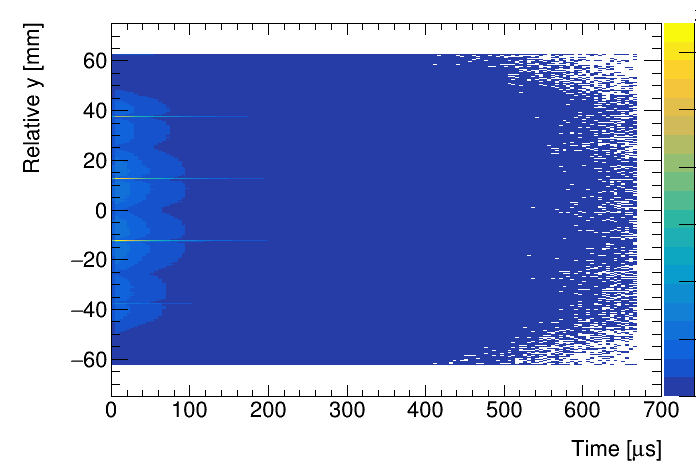

In [102]:
c = r.TCanvas()
allClusterY_vs_Time.Draw("colz")
c.Draw()

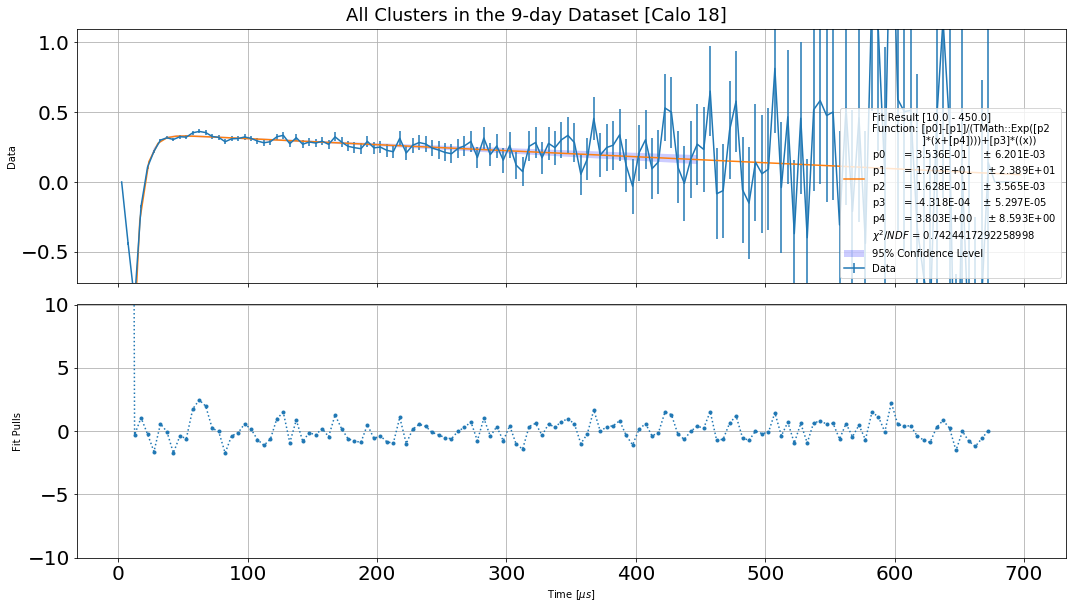

In [103]:
times, means, meanErrs = TH1ToNumpyArray( allClusterY_vs_Time.ProfileX() )
#means = [(x-3.)*25. for x in means]
#meanErrs = [(x)*25. for x in meanErrs]
for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fitresult.draw("All Clusters in the 9-day Dataset [Calo "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
plt.xlabel(r"Time [$\mu s$]")

plt.show()

---

### And now lets compare what the entire tracker sees

---

In [104]:
allTracks_yCalo_vs_yBeam_vs_Time = f[caloToPlot].Get("allTracks_yCalo_vs_yBeam_vs_Time").Clone()
allTracks_yCalo_vs_yBeam_vs_Time.SetDirectory(0)
allTracks_yCalo_vs_yBeam_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("allTracks_yCalo_vs_yBeam_vs_Time") at 0x7f5e18abf680>

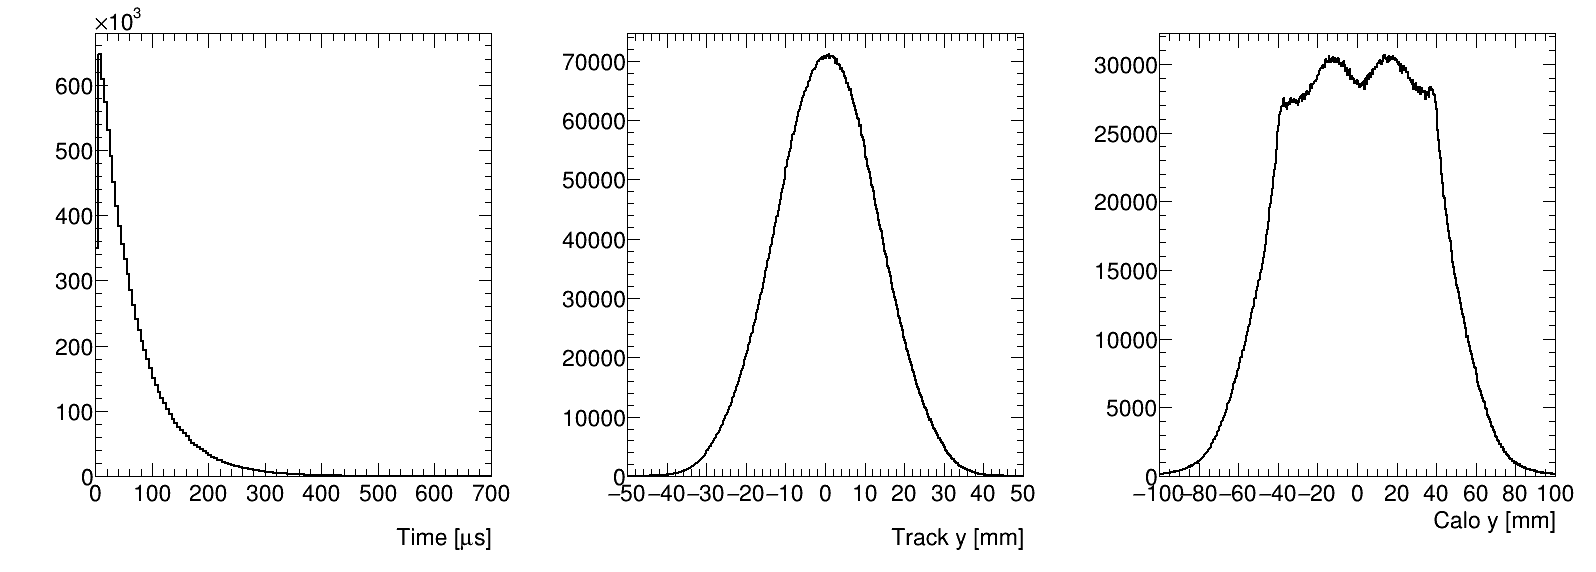

In [105]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    allTracks_yCalo_vs_yBeam_vs_Time.Project3D(axi).Draw()
c.Draw()

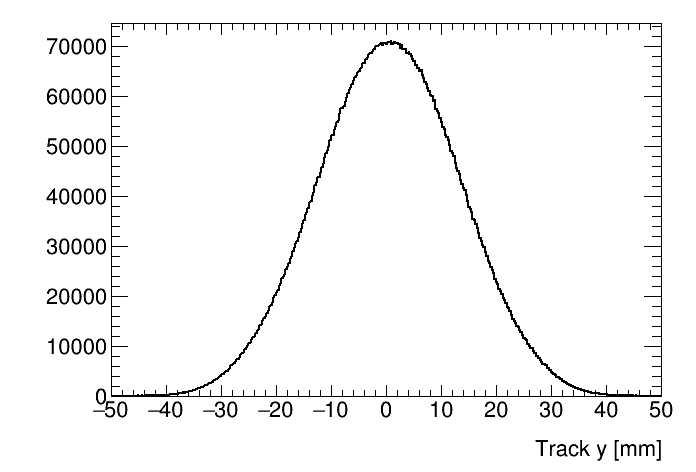

In [106]:
c = r.TCanvas()
allTracks_yCalo_vs_yBeam_vs_Time.Project3D("y").Draw("colz")
c.Draw()

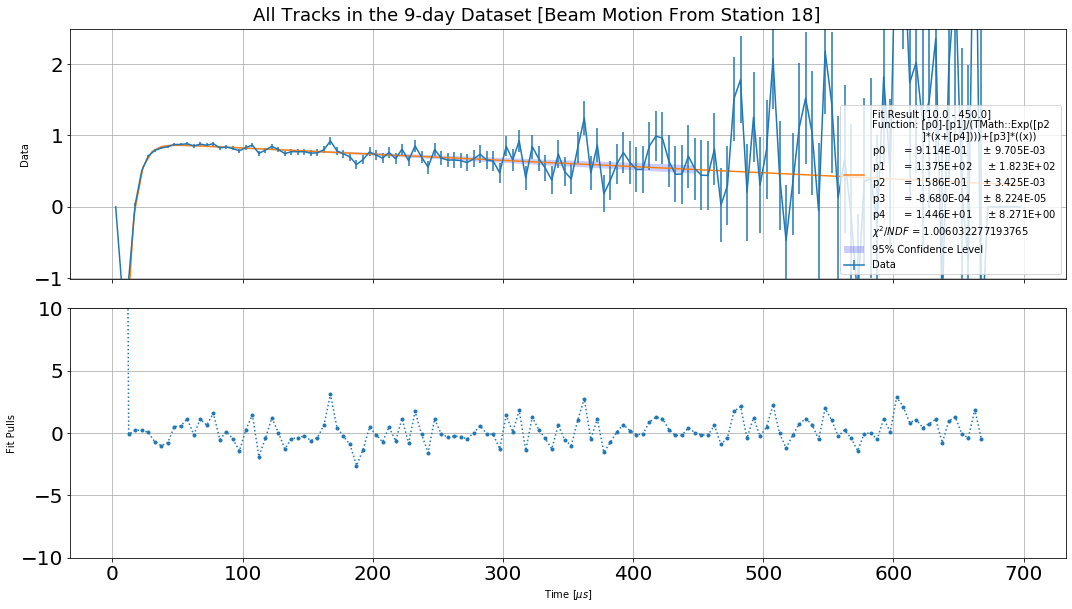

In [107]:
times, means, meanErrs = TH1ToNumpyArray( allTracks_yCalo_vs_yBeam_vs_Time.Project3D("yx").ProfileX() )

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)


fig,ax = fitresult.draw("All Tracks in the 9-day Dataset [Beam Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
plt.xlabel(r"Time [$\mu s$]")

plt.show()

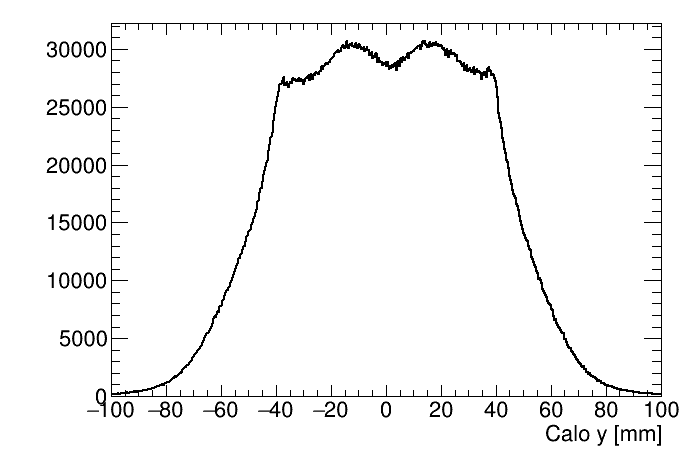

In [108]:
c = r.TCanvas()
allTracks_yCalo_vs_yBeam_vs_Time.Project3D("z").Draw("colz")
c.Draw()

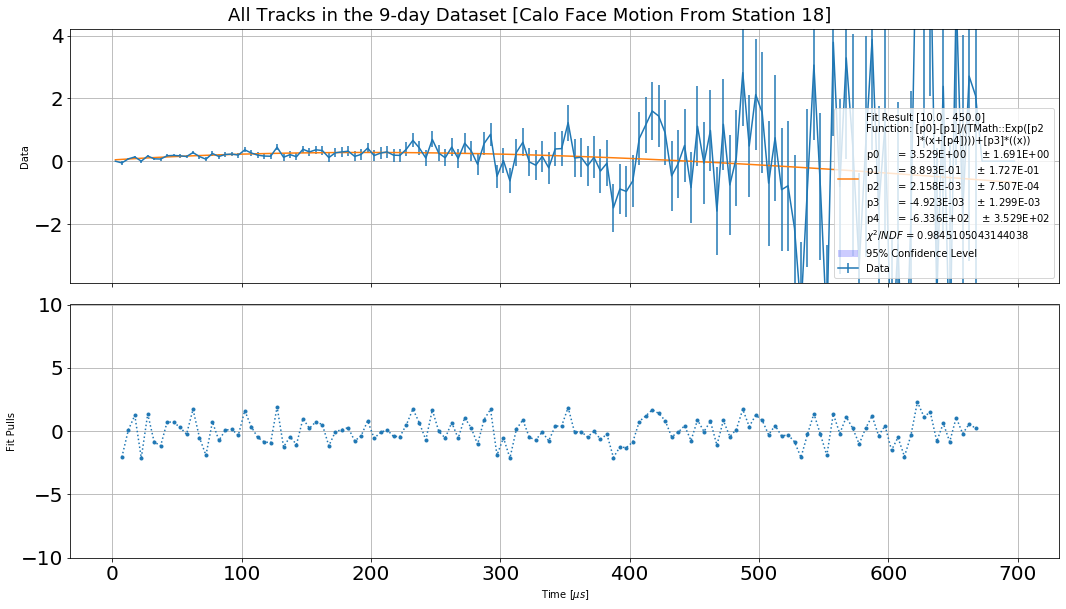

In [109]:
times, means, meanErrs = TH1ToNumpyArray( allTracks_yCalo_vs_yBeam_vs_Time.Project3D("zx").ProfileX() )

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("All Tracks in the 9-day Dataset [Calo Face Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
plt.xlabel(r"Time [$\mu s$]")

plt.show()


---

### And now the matched tracks

---

In [110]:
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time = f[caloToPlot].Get("matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time").Clone()
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.SetDirectory(0)
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time") at 0x7fffc6506350>

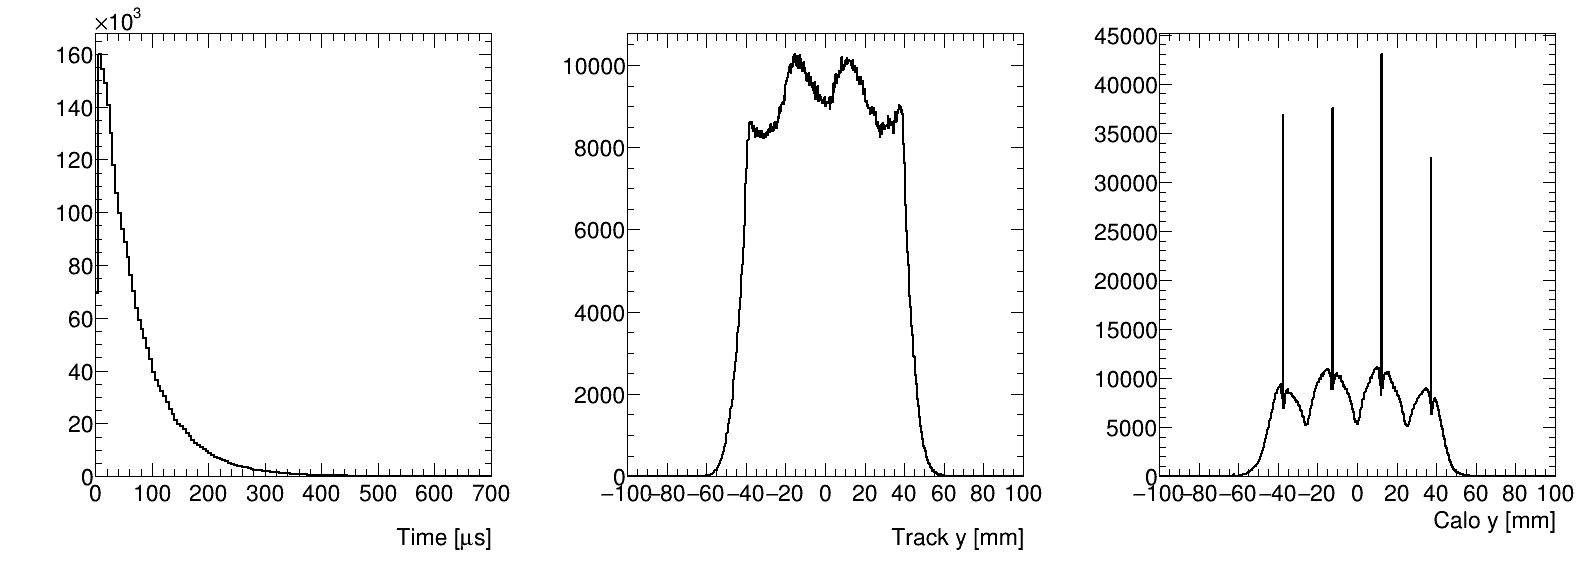

In [111]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D(axi).Draw()
c.Draw()

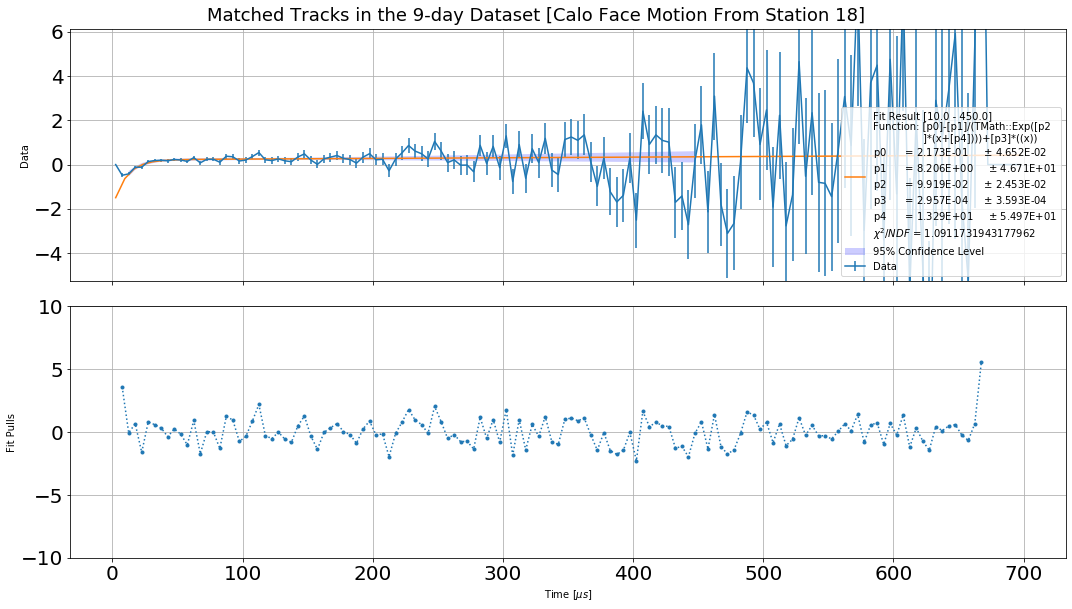

In [112]:
times, means, meanErrs = TH1ToNumpyArray( matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D("yx").ProfileX() )


paramVec = [1,10,1,0.0001,10,0.001]
for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Calo Face Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
plt.xlabel(r"Time [$\mu s$]")


plt.show()

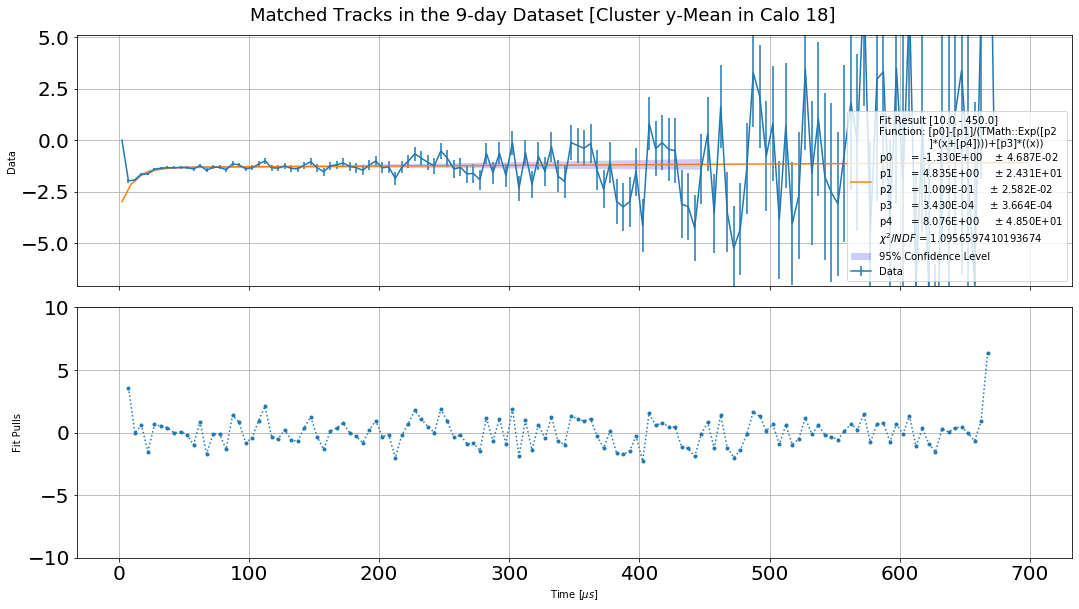

In [113]:
times, means, meanErrs = TH1ToNumpyArray( matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D("zx").ProfileX() )

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Cluster y-Mean in Calo "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
plt.xlabel(r"Time [$\mu s$]")

plt.show()

---

### Now lets compare the fit results

---

In [114]:
print([x[1] for x in allFitResults])

[([0.3536086297496678, 17.026644847643148, 0.1627734376408636, -0.0004317844527057112, 3.803433767586291], [0.006201230088595907, 23.893028738792033, 0.00356529776990629, 5.297039592498809e-05, 8.59283935220375]), ([0.9114304309758184, 137.51810463945563, 0.15858252479289678, -0.000868021298057027, 14.462197496799023], [0.009705361856211202, 182.26539267340587, 0.0034253910607599976, 8.223865708182635e-05, 8.270704345827694]), ([3.5292896216230205, 0.8892637902001385, 0.0021579778241936007, -0.004923304932576407, -633.6461492125967], [1.69092150482864, 0.1726580409315382, 0.000750749847551089, 0.0012994529914301543, 352.885485203637]), ([0.2172727820921396, 8.20557655256436, 0.09918782090010418, 0.0002957355249701706, 13.29261855037009], [0.046522795007334146, 46.70846137440101, 0.024534963245268215, 0.0003592920248953116, 54.96582049220566]), ([-1.3296984185087102, 4.835172967165325, 0.10087857232820786, 0.00034296252099842093, 8.076321890885835], [0.046874649448076684, 24.31284656760

5
[0.7424417292258998, 1.006032277193765, 0.9845105043144038, 1.0911731943177962, 1.0956597410193674]


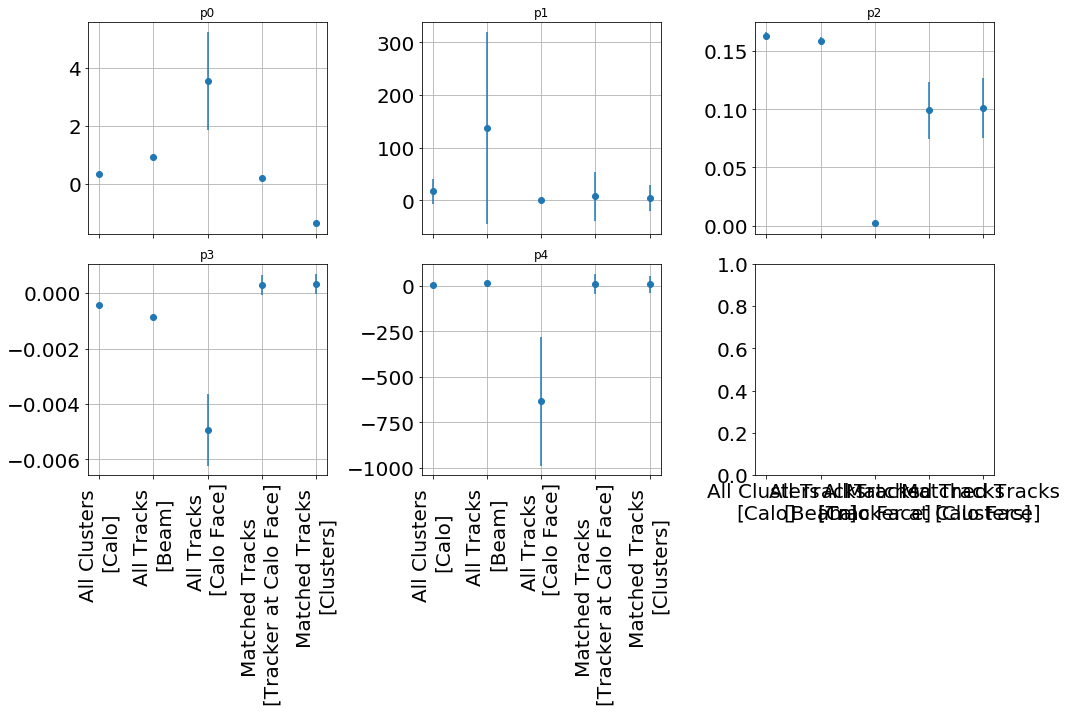

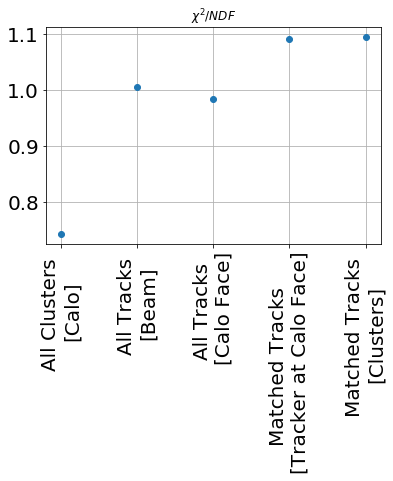

In [115]:
nPlots = len(allFitResults[0][1][0])
print(nPlots)

names = ["All Clusters \n[Calo]", "All Tracks \n[Beam]", 'All Tracks \n[Calo Face]', 
         'Matched Tracks \n[Tracker at Calo Face]', 'Matched Tracks \n[Clusters]']
parNames = ['p'+str(i) for i in range(nPlots)]

allPars, allParErrs = zip(*[x[1] for x in allFitResults])
allChiSquare = [x[2] for x in allFitResults]
print(allChiSquare)
parsByPar = zip(*allPars)
errsByPar = [x for x in zip(*allParErrs)]

fig,axs = plt.subplots(2,int((nPlots+1)/2), figsize=(15,10), sharex=True)
try:
    ax = flatten2dArray(axs)
except:
    ax = axs
for i,x in enumerate(parsByPar):
    axi = ax[i]
    axi.set_title(parNames[i])
    axi.errorbar([i for i in range(len(names))],x, yerr=errsByPar[i],fmt="o")
    axi.set_xticks([i for i in range(len(names))])
    axi.set_xticklabels(names,rotation=90)
    axi.grid()
    #axi.set_ylim(np.abs(x[0])*-5,np.abs(x[0])*5)
plt.tight_layout()
plt.show()


fig,ax = plt.subplots()
plt.plot(allChiSquare,"o")
plt.grid()
ax.set_xticks([i for i in range(len(names))])
ax.set_xticklabels(names,rotation=90)
plt.title(r"$\chi^{2} / NDF$")
plt.show()